In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
import os
import pathlib
import itertools
package_path = os.path.join(pathlib.Path.home(), "mkvchain")
sys.path.append(package_path)
from model import FeatureDependentMarkovChain

In [10]:
np.unique(states)

array([0, 1, 2, 3])

In [11]:
root = pathlib.Path.home()
# pt = os.path.join(root, 'research', 'gen_287_2013_2017_state.csv')
pt = os.path.join(root, 'research', 'GADS_Processed', "trajectories", 'gen_287_type_100_dtgrp_1_rating_1_state_Iowa_traj.csv')
data = pd.read_csv(pt)

x = (data['x'].values)
T = len(x)
features = np.column_stack([x.T, np.zeros(T)])

states = (data["y"].values - 1)
n = 4


In [12]:
model1 = FeatureDependentMarkovChain(n, n_iter=1) # 3 states
model1.fit(states, features, [T], verbose=False) # states, features, lengths

In [13]:
predict_features = np.column_stack([x, np.zeros(T)])
Phat1 = model1.predict(predict_features)
# print(Phat1)

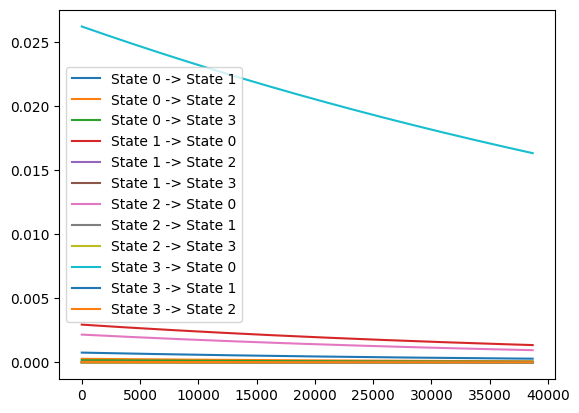

In [ ]:
idx = [g for g in itertools.product(range(4), range(4))]

fig, ax = plt.subplots()

xrange = range(38688)
# ax.set_yscale('log')
for g in idx:

    if g[0] == g[1]:
        continue
    else:
        ax.plot(xrange, Phat1[:, g[0], g[1]], label=f"State {g[0]} -> State {g[1]}")

ax.legend()